In [195]:
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt    
import seaborn as sns
import tensorflow as tf
import random
import os
import gc
from sklearn import cluster
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import  LabelEncoder, RobustScaler , MinMaxScaler ,StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tensorflow import keras
import os
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
from tqdm.notebook import tqdm

In [196]:
data_test = pd.read_csv('dataset_clean/data_test_clean.csv')
data_train = pd.read_csv('dataset_clean/data_train_clean.csv')
data_submission = pd.read_csv('dataset/sample_submission.csv')
# data_all = pd.concat([data_test,data_train], ignore_index=True)
data_train.drop("Unnamed: 0", axis=1, inplace=True)
data_train.drop("Segmentation", axis=1, inplace=True)
data_test.drop("Unnamed: 0", axis=1, inplace=True)
data_train.shape, data_test.shape, data_submission.shape

((8068, 10), (2627, 10), (2627, 2))

In [197]:
from sklearn.preprocessing import StandardScaler,RobustScaler
sc = StandardScaler()
rb = RobustScaler()

In [198]:
#data train
cat_columns = [x for (x, y) in data_train.dtypes.items() if y == "object"]
num_columns = [x for (x, y) in data_train.dtypes.items() if y != "object"]

num_data = data_train[num_columns]
cat_data = data_train[cat_columns]
print('Categorical columns -> ', cat_columns)
print('\nNumerical columns -> ', num_columns)



Categorical columns ->  ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

Numerical columns ->  ['ID', 'Age', 'Work_Experience', 'Family_Size']


In [199]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in cat_columns:
    data_train[i]=data_train[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")
data_train.head()

All features are now numerical


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,1,0,22,0,5,1.0,2,4.0,3
1,462643,0,1,38,1,2,0.0,0,3.0,3
2,466315,0,1,67,1,2,1.0,2,1.0,5
3,461735,1,1,67,1,8,0.0,1,2.0,5
4,462669,0,1,40,1,3,0.0,1,6.0,5


In [200]:
#data test
cat_columns = [x for (x, y) in data_test.dtypes.items() if y == "object"]
num_columns = [x for (x, y) in data_test.dtypes.items() if y != "object"]

num_data = data_test[num_columns]
cat_data = data_test[cat_columns]

print('Categorical columns -> ', cat_columns)
print('\nNumerical columns -> ', num_columns)

Categorical columns ->  ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

Numerical columns ->  ['ID', 'Age', 'Work_Experience', 'Family_Size']


In [201]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in cat_columns:
    data_test[i]=data_test[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [202]:
data_test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,0,1,36,1,2,0.0,2,1.0,5
1,458994,1,1,37,1,5,8.0,0,4.0,5
2,458996,0,1,69,0,7,0.0,2,1.0,5
3,459000,1,1,59,0,4,11.0,1,2.0,5
4,459001,0,0,19,0,9,0.0,2,4.0,5


In [203]:
data_test.shape

(2627, 10)

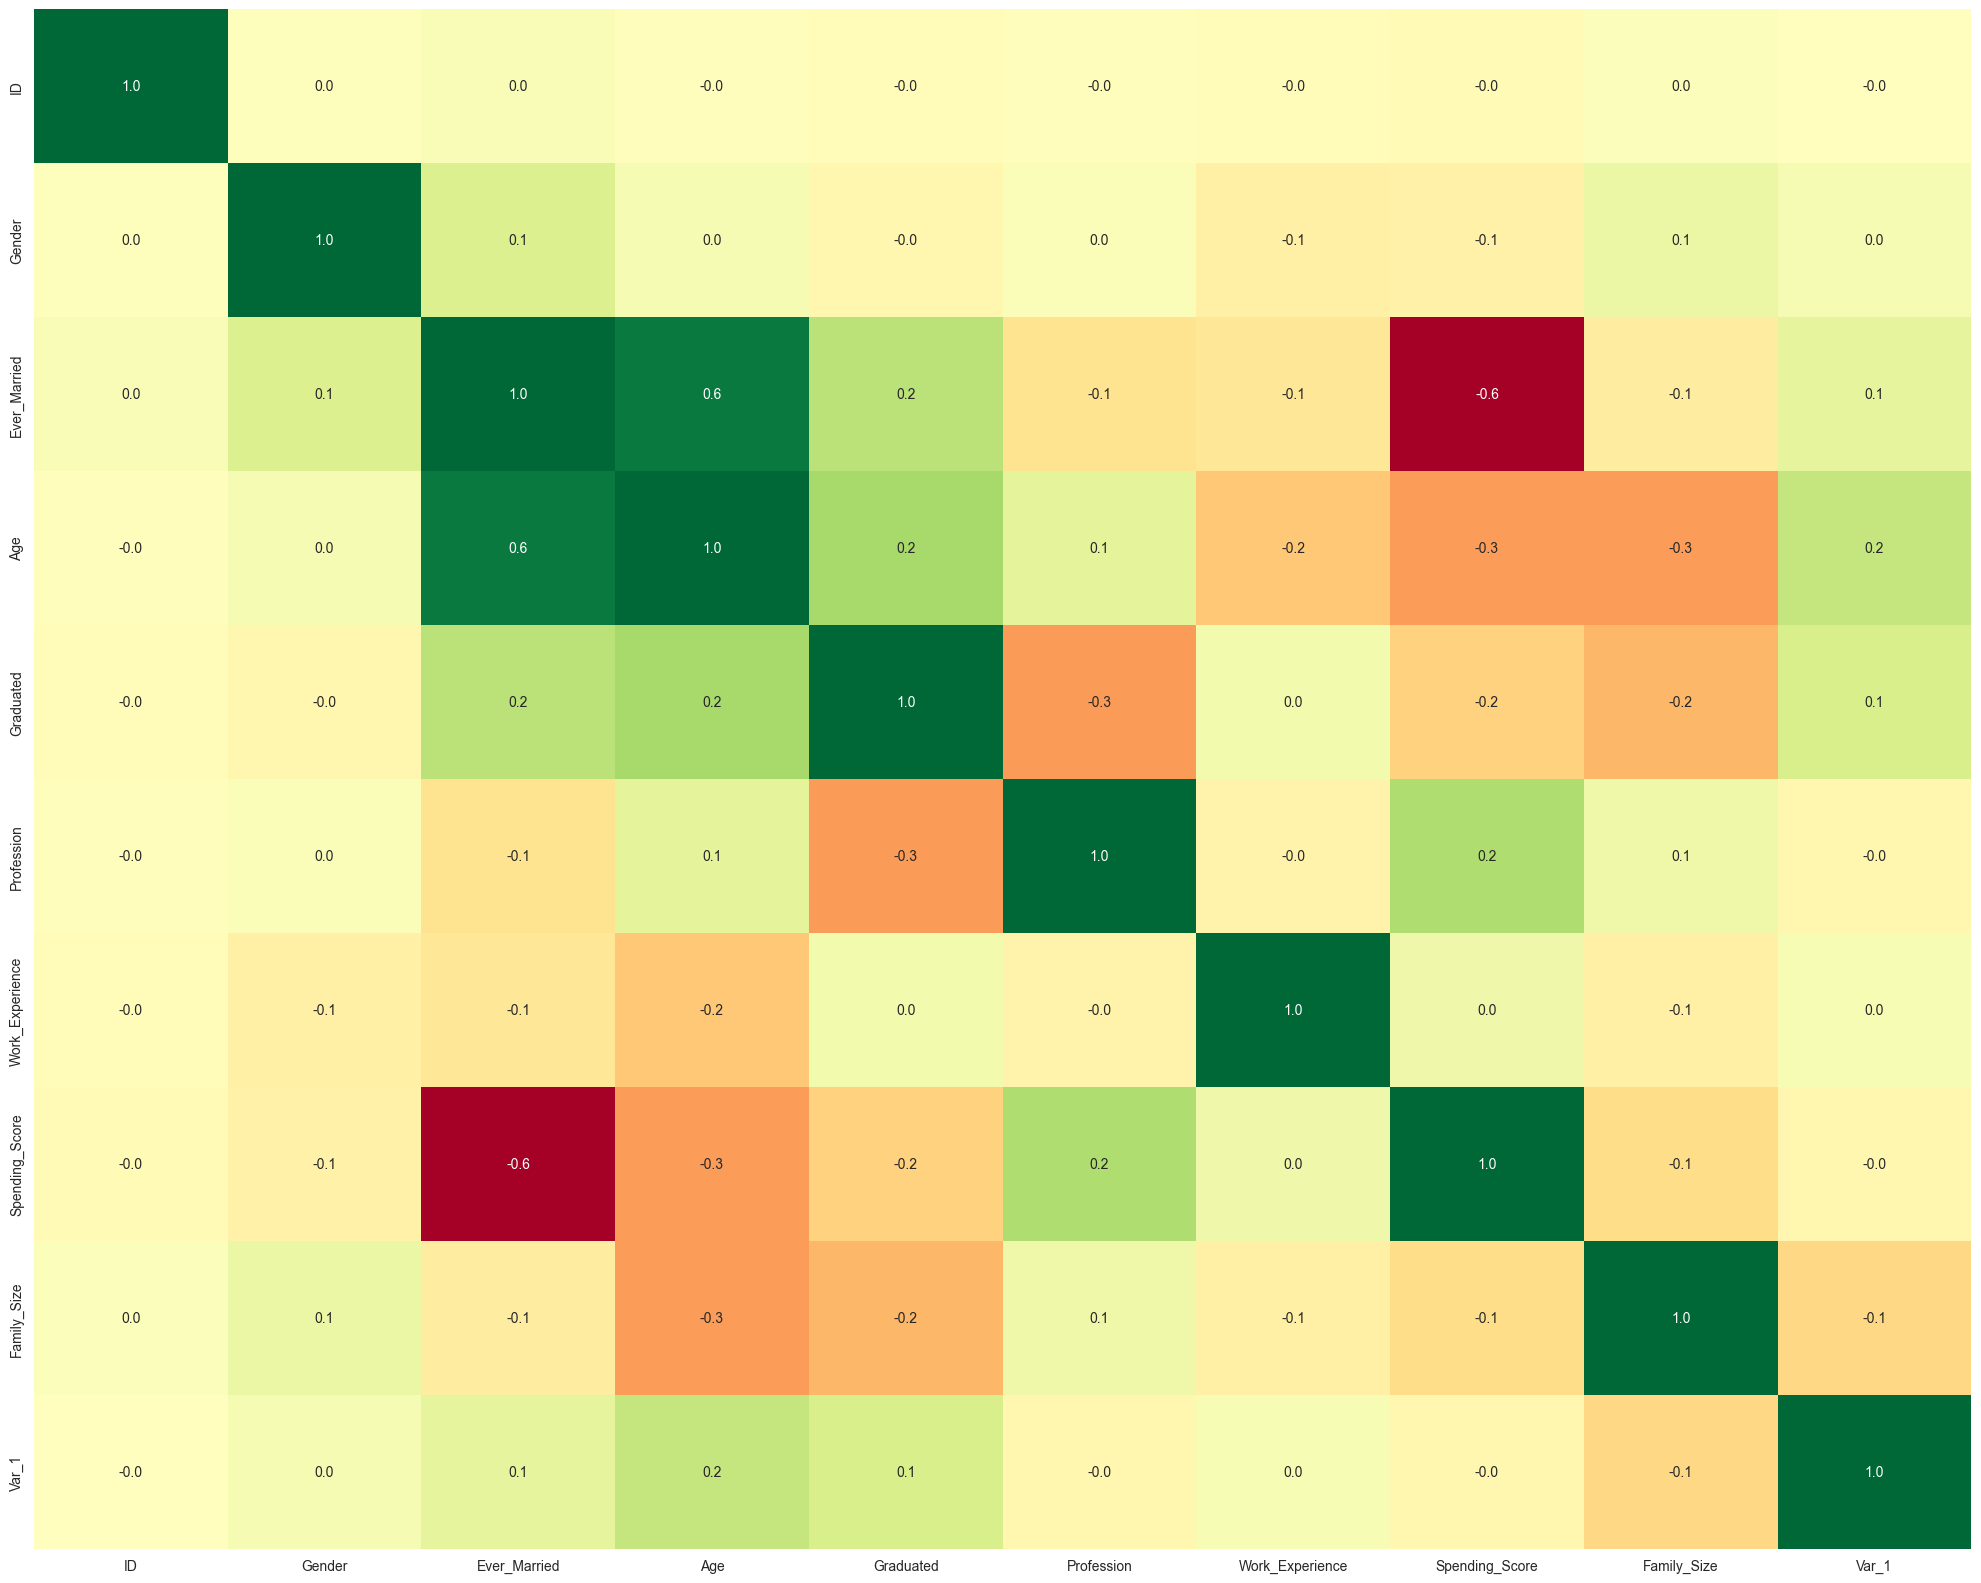

In [204]:
# Heat Map
plt.subplots(figsize=(25,20))
sns.heatmap(data_train.corr(), annot= True, cmap="RdYlGn", fmt = '0.1f', vmin=-0.6, vmax=0.6, cbar=False);

In [205]:
# Correlation matrix
corrMatrix =data_train.corr(method='pearson', min_periods=1)
corrMatrix.style.background_gradient(axis=None)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
ID,1.000000,0.006155,0.022892,-0.005055,-0.009377,-0.006139,-0.012364,-0.018949,0.012601,-0.001955
Gender,0.006155,1.000000,0.111732,0.030216,-0.033206,0.016022,-0.056866,-0.054261,0.057920,0.029660
Ever_Married,0.022892,0.111732,1.000000,0.556892,0.188450,-0.107170,-0.089820,-0.625252,-0.067102,0.076450
Age,-0.005055,0.030216,0.556892,1.000000,0.235752,0.082828,-0.174199,-0.269544,-0.270793,0.167332
Graduated,-0.009377,-0.033206,0.188450,0.235752,1.000000,-0.276561,0.041654,-0.151911,-0.217698,0.120044
Profession,-0.006139,0.016022,-0.107170,0.082828,-0.276561,1.000000,-0.045049,0.217470,0.053512,-0.034751
Work_Experience,-0.012364,-0.056866,-0.089820,-0.174199,0.041654,-0.045049,1.000000,0.048372,-0.058875,0.027755
Spending_Score,-0.018949,-0.054261,-0.625252,-0.269544,-0.151911,0.217470,0.048372,1.000000,-0.122230,-0.032833
Family_Size,0.012601,0.057920,-0.067102,-0.270793,-0.217698,0.053512,-0.058875,-0.122230,1.000000,-0.137801
Var_1,-0.001955,0.029660,0.076450,0.167332,0.120044,-0.034751,0.027755,-0.032833,-0.137801,1.000000


Text(0.5, 1.0, 'Distribution of mean per row in the dataset')

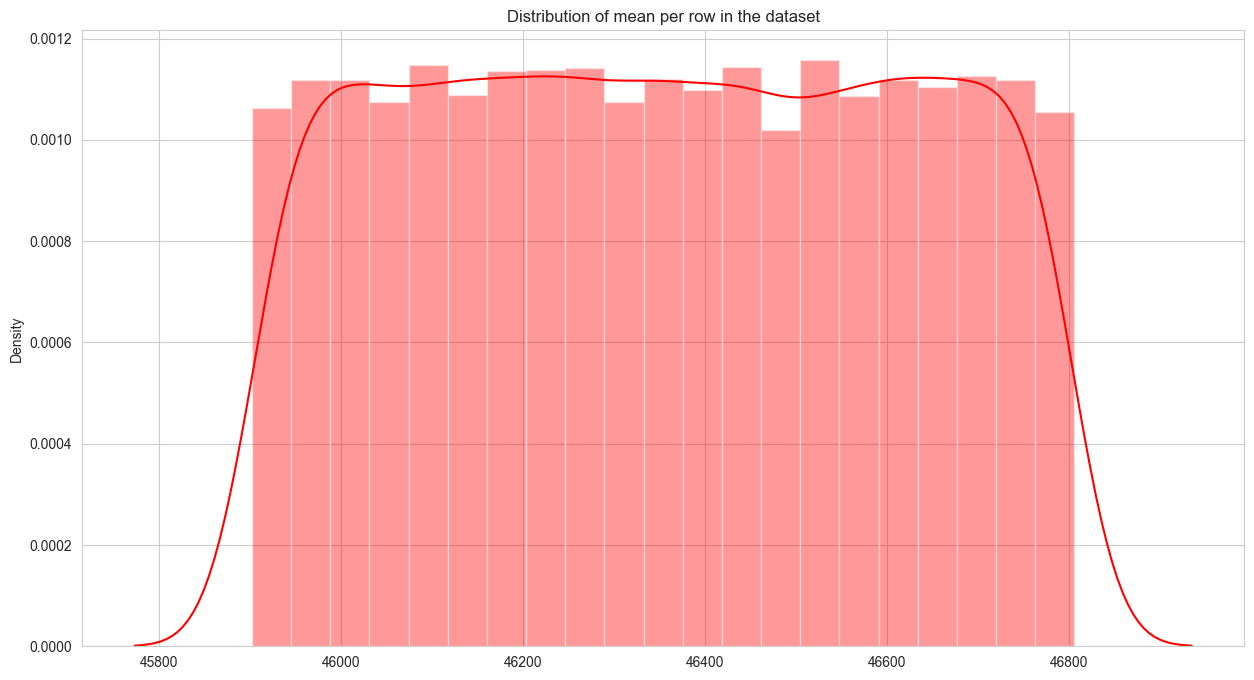

In [206]:
plt.figure(figsize=(15,8))
features = data_train.columns.values
sns.distplot(data_train[features].mean(axis=1), color='red', kde=True, label='train')
plt.title('Distribution of mean per row in the dataset')

Text(0.5, 1.0, 'Distribution of std per row in the dataset')

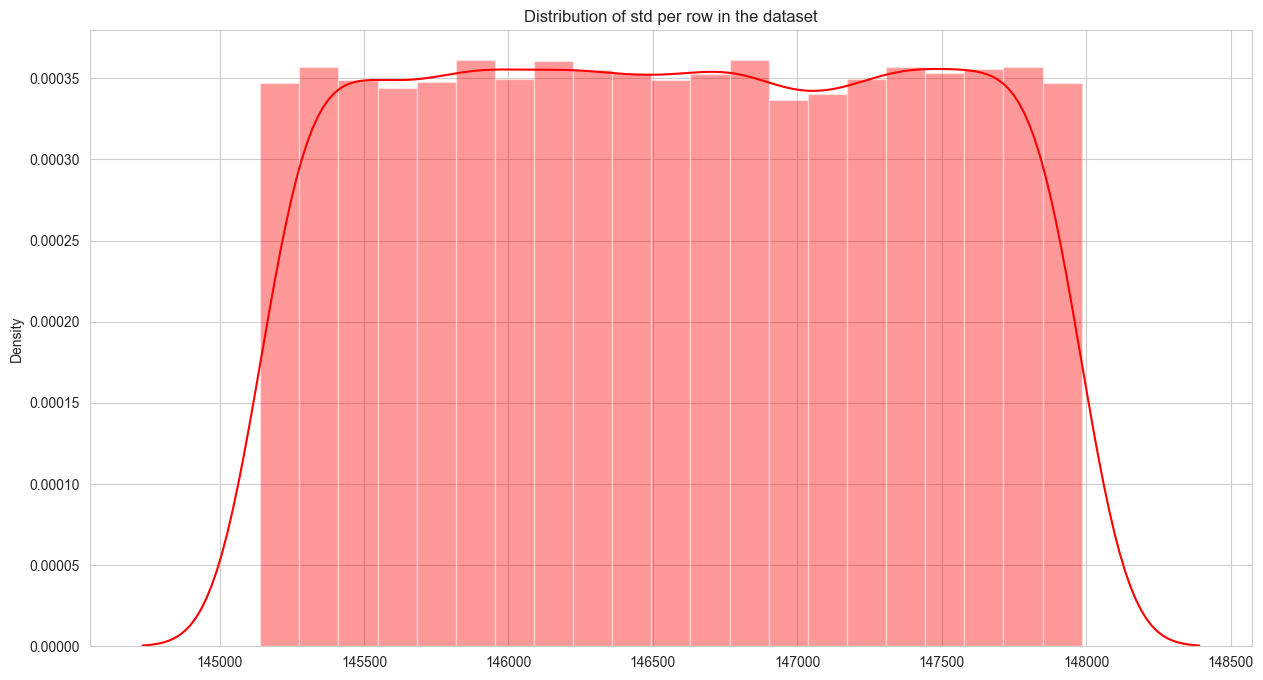

In [207]:
plt.figure(figsize=(15,8))
features = data_train.columns.values
sns.distplot(data_train[features].std(axis=1), color='red', kde=True, label='train')
plt.title('Distribution of std per row in the dataset')

Text(0.5, 1.0, 'Distribution of mean per column in the dataset')

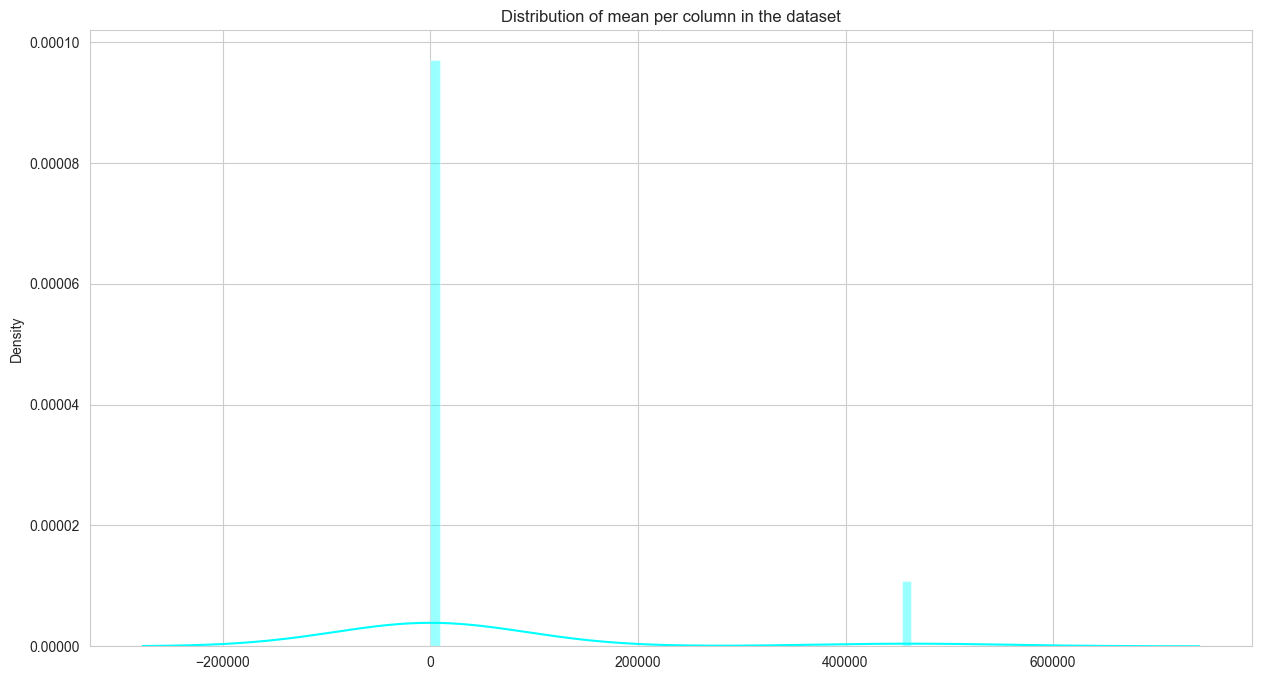

In [208]:
plt.figure(figsize=(15,8))
features = data_train.columns.values
sns.distplot(data_train[features].mean(axis=0), color='cyan', kde=True, label='train')
plt.title('Distribution of mean per column in the dataset')

**K-Mean**

In [209]:
from sklearn.cluster import KMeans
X = data_train.values

# 10 clusters
n_clusters = 4
# Runs in parallel All CPUs

# Train K-Means.
kmeans = KMeans(n_clusters = n_clusters, n_init = 20).fit(X)

In [210]:
kmeans.labels_

array([3, 3, 2, ..., 1, 2, 3])

In [211]:
target=kmeans.labels_

In [212]:
pd.DataFrame(target)[0].value_counts()

0
2    2078
3    2018
1    2003
0    1969
Name: count, dtype: int64

In [213]:
rb.fit(data_train)
data_train = rb.transform(data_train)

data_train.shape, target.shape

((8068, 10), (8068,))

Main Model DNN


In [214]:
def build_model():   
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, activation="relu", input_shape=(10,)))

    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Dense(64, activation="relu", kernel_regularizer = tf.keras.regularizers.l2()))
    
    model.add(layers.Dense(32, activation="relu"))
    
    model.add(layers.Dense(4, activation="softmax"))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy',])

    #model.summary()

    return model

In [215]:
model = build_model()
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 256)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,340 (196.64 KB)

 Trainable params: 50,340 (196.64 KB)

 Non-trainable params: 0 (0.00 B)

In [216]:
save_best = tf.keras.callbacks.ModelCheckpoint("Model.keras", verbose=1, monitor='val_accuracy', save_best_only=True)

In [217]:
model.fit(data_train, target, validation_split=0.2, epochs=30, batch_size=256, shuffle=True, callbacks=[save_best])

Epoch 1/30
16/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2474 - loss: 2.0280   
Epoch 1: val_accuracy improved from -inf to 0.26332, saving model to Model.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2485 - loss: 2.0234 - val_accuracy: 0.2633 - val_loss: 1.9863
Epoch 2/30
16/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2634 - loss: 1.9876 
Epoch 2: val_accuracy improved from 0.26332 to 0.39157, saving model to Model.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2681 - loss: 1.9840 - val_accuracy: 0.3916 - val_loss: 1.9495
Epoch 3/30
16/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3211 - loss: 1.9489 
Epoch 3: val_accuracy improved from 0.39157 to 0.53036, saving model to Model.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3275 - loss: 1.9448 - val_accuracy: 0.5304 - val_loss: 1.8970
Epoch 4/30
17/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3781 - loss: 1.9005 
Epoch 4: val_accuracy improved from 0.53036 to 0.58860, saving 

Model Prediction

In [218]:
pred = model.predict(data_test, verbose=1)
pred = np.argmax(pred, axis=1)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Prediction of Cluster

In [219]:
pd.DataFrame(pred)[0].value_counts()

0
2    2627
Name: count, dtype: int64

In [194]:
data_submission['Predicted'] = kmeans.labels_
data_submission.to_csv('submission.csv', index=False)

ValueError: Length of values (8068) does not match length of index (2627)